<h2>Initialise files</h2>

In [1]:
import pandas as pd
import numpy as np
import math
import os
from functools import reduce
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

Declare variable constants

In [2]:
FOLER_PATH = 'UOA_raw'
OUTPUT_FILE_PATH = 'uoa_gen'
TODAY = str(dt.date.today())

Parse, combine and output data in all UOA files

In [3]:
def parse_data_df_to_excel(df): 
    df['Exp Date'] = pd.to_datetime(df['Exp Date']).dt.date
    df['Trade date'] = pd.to_datetime(df['Trade date']).dt.date
    data_df = df.loc[:].dropna()
    data_df = data_df.astype({'DTE': int})
    return data_df.values.tolist()

In [4]:
def parse_data_headers(df): 
    df.rename(columns={'Time': 'Trade date'}, inplace=True)
    return df.columns.values.tolist()

In [5]:
import csv

columns_headers = [] 
data = []

for entry in os.listdir(FOLER_PATH):
    file_path = os.path.join(FOLER_PATH, entry)
    print(file_path)
    if os.path.isfile(file_path):
        df = pd.read_csv(file_path)
        column_headers = parse_data_headers(df)
        data.extend(parse_data_df_to_excel(df))

# flatten as single level array 
all_data = []
all_data.extend([column_headers])
all_data.extend(data)

print(all_data[0])
print(all_data[1])

output_file = open(f'{OUTPUT_FILE_PATH}.csv', 'w',  newline='')
writer =  csv.writer(output_file)
writer.writerows(all_data)
output_file.close()

UOA_raw\.ipynb_checkpoints
UOA_raw\unusual-options-activity-07-06-2021.csv
UOA_raw\unusual-options-activity-07-07-2021.csv
UOA_raw\unusual-options-activity-07-08-2021.csv
UOA_raw\unusual-stocks-options-activity-07-01-2021.csv
UOA_raw\unusual-stocks-options-activity-07-02-2021.csv
['Symbol', 'Price', 'Type', 'Strike', 'Exp Date', 'DTE', 'Bid', 'Midpoint', 'Ask', 'Last', 'Volume', 'Open Int', 'Vol/OI', 'IV', 'Delta', 'Trade date']
['COOP', 33.09, 'Call', 40.0, datetime.date(2022, 1, 21), 199, 1.65, 1.73, 1.8, 1.8, 15416.0, 193.0, 79.88, '41.34%', 31.9936, datetime.date(2021, 7, 6)]


<h2>ETL data</h2>

Display some data for visual check 

In [6]:
df = pd.read_csv(f'{OUTPUT_FILE_PATH}.csv')
display(df.head())
display(df.info())

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Trade date
0,COOP,33.09,Call,40.0,2022-01-21,199,1.65,1.73,1.80,1.80,15416.0,193.0,79.88,41.34%,31.9936,2021-07-06
1,AAPL,142.02,Put,142.0,2021-07-16,10,2.04,2.09,2.13,2.10,9282.0,129.0,71.95,22.40%,-49.2563,2021-07-06
2,AMZN,3675.74,Call,3680.0,2021-07-09,3,40.00,41.00,42.00,41.25,10372.0,154.0,67.35,32.58%,49.0355,2021-07-06
3,KO,53.88,Call,54.5,2021-07-23,17,0.66,0.68,0.69,0.68,24902.0,389.0,64.02,21.13%,39.9747,2021-07-06
4,GLOP,5.03,Call,7.5,2021-07-16,10,0.10,0.13,0.15,0.10,23874.0,395.0,60.44,194.00%,13.9095,2021-07-06


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8482 entries, 0 to 8481
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      8482 non-null   object 
 1   Price       8482 non-null   float64
 2   Type        8482 non-null   object 
 3   Strike      8482 non-null   float64
 4   Exp Date    8482 non-null   object 
 5   DTE         8482 non-null   int64  
 6   Bid         8482 non-null   float64
 7   Midpoint    8482 non-null   float64
 8   Ask         8482 non-null   float64
 9   Last        8482 non-null   float64
 10  Volume      8482 non-null   float64
 11  Open Int    8482 non-null   float64
 12  Vol/OI      8482 non-null   float64
 13  IV          8482 non-null   object 
 14  Delta       8482 non-null   float64
 15  Trade date  8482 non-null   object 
dtypes: float64(10), int64(1), object(5)
memory usage: 1.0+ MB


None

<h3>Sort and add useful columns</h3>

"""
add vol * mid 
arrange according to ticker / DTE / type
calculate total call + put 
"""

In [7]:
df = df.sort_values(['Symbol', 'DTE', 'Type'], ascending=True)
df['Amount'] = df['Volume'] * df['Midpoint']
display(df)

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Trade date,Amount
8197,AA,37.92,Call,38.0,2021-07-09,7,0.77,0.80,0.84,0.76,658.0,431.0,1.53,40.25%,49.6172,2021-07-02,526.40
975,AA,36.47,Put,36.0,2021-07-16,10,1.35,1.38,1.41,1.36,7139.0,3622.0,1.97,66.25%,-43.1191,2021-07-06,9851.82
1369,AA,36.47,Put,35.0,2021-07-16,10,0.92,0.95,0.98,0.98,2674.0,1895.0,1.41,68.26%,-33.6921,2021-07-06,2540.30
6945,AA,37.92,Put,37.0,2021-07-16,14,1.26,1.29,1.32,1.32,5549.0,448.0,12.39,59.56%,-39.3890,2021-07-02,7158.21
4966,AA,36.84,Call,37.5,2021-07-16,16,1.56,1.59,1.61,1.60,563.0,134.0,4.20,61.61%,47.0959,2021-06-30,895.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1363,ZS,225.00,Call,230.0,2021-07-09,3,1.36,1.46,1.56,1.45,1429.0,1014.0,1.41,41.05%,28.3693,2021-07-06,2086.34
6509,ZTS,186.36,Put,190.0,2021-07-16,16,4.50,4.65,4.80,4.87,762.0,530.0,1.44,15.11%,-72.6198,2021-06-30,3543.30
4518,ZUO,17.25,Call,20.0,2021-07-16,16,0.10,0.22,0.35,0.10,1138.0,152.0,7.49,54.91%,10.9562,2021-06-30,250.36
4986,ZUO,17.25,Put,17.0,2021-07-16,16,0.45,0.48,0.50,0.50,1036.0,250.0,4.14,43.17%,-41.7949,2021-06-30,497.28


Replace file

In [8]:
df.to_csv(f'{OUTPUT_FILE_PATH}.csv')

<h3>Daily trade put-call charts</h3>

In [9]:
daily_group = df.groupby(["Trade date", "Type"]).agg({'Volume': 'sum', 'Amount': 'sum'})
daily_group = daily_group.reset_index()
daily_group

,Trade date,Type,Volume,Amount
0,2021-06-30,Call,2847291.0,13354451.63
1,2021-06-30,Put,929047.0,2655134.82
2,2021-07-01,Call,4980875.0,30834016.20
3,2021-07-01,Put,1650669.0,4189984.22
4,2021-07-02,Call,4303604.0,17167419.53
5,2021-07-02,Put,1770927.0,4796463.30
6,2021-07-06,Call,4968752.0,32080340.91
7,2021-07-06,Put,1516929.0,3930081.61
8,2021-07-07,Call,5398435.0,16218416.73
9,2021-07-07,Put,1493827.0,5025948.76


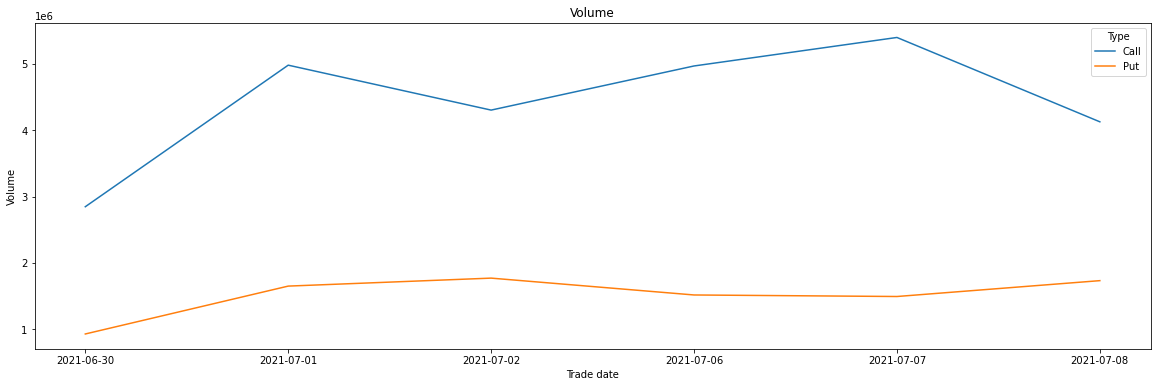

In [10]:
def line_plot(data): 
    fig = plt.figure(figsize=(20, 6))
    sns.lineplot(data=data, x="Trade date", y="Volume", hue="Type")
    plt.title('Volume')
    plt.show()
    
line_plot(daily_group)

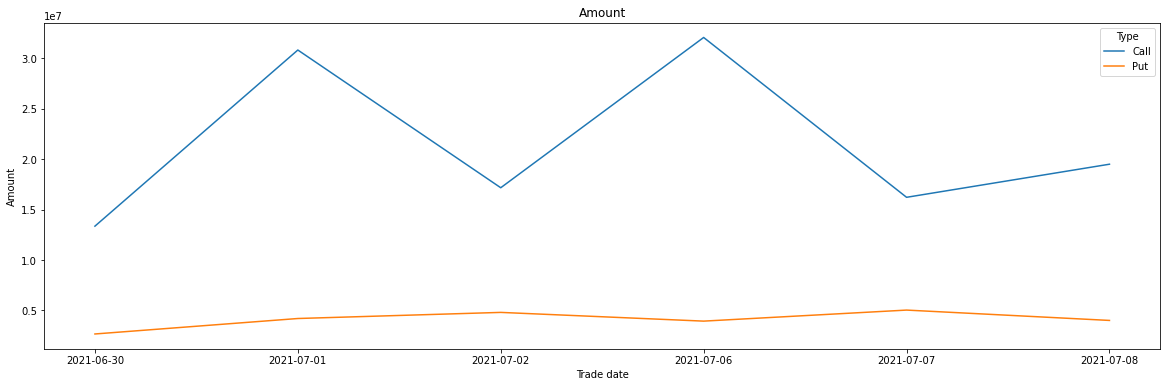

In [11]:
def line_plot(data): 
    fig = plt.figure(figsize=(20, 6))
    sns.lineplot(data=data, x="Trade date", y="Amount", hue="Type")
    plt.title('Amount')
    plt.show()
    
line_plot(daily_group)

<h3>Most active symbol</h3> 

In [36]:
def group_and_sum(_df): 
    return _df.groupby(['Symbol', 'Exp Date', 'Type', 'Trade date']).agg({'Amount': 'sum'})

def sort_and_display(_df): 
    return _df.reset_index().sort_values(by=['Amount'], ascending=False)

def sort_vol_oi_ratio(_df): 
    return _df.sort_values(by=['Vol/OI'], ascending=False)

In [13]:
df_symbols = group_and_sum(df)
df_symbols

Amount
Symbol Exp Date   Type Trade date          
AA     2021-07-09 Call 2021-07-02    526.40
       2021-07-16 Call 2021-06-30    895.17
                  Put  2021-07-02   7158.21
                       2021-07-06  12392.12
       2021-08-20 Call 2021-07-08  15878.96
...                                     ...
ZS     2021-07-09 Call 2021-07-07    719.55
ZTS    2021-07-16 Put  2021-06-30   3543.30
ZUO    2021-07-16 Call 2021-06-30    250.36
                  Put  2021-06-30    497.28
       2021-09-17 Put  2021-06-30   1421.40

[4469 rows x 1 columns]

View after today only 

In [14]:
df = df[(df['Exp Date']  > TODAY)].reset_index(drop=True)
df_calls = df[(df['Type'] == 'Call')]
df_puts = df[(df['Type'] == 'Put')]
df_calls

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Trade date,Amount
3,AA,36.84,Call,37.5,2021-07-16,16,1.56,1.59,1.61,1.60,563.0,134.0,4.20,61.61%,47.0959,2021-06-30,895.17
4,AA,35.36,Call,43.0,2021-08-20,43,0.62,0.64,0.65,0.61,5103.0,107.0,47.69,57.03%,18.3694,2021-07-08,3265.92
5,AA,35.36,Call,36.0,2021-08-20,43,2.39,2.42,2.45,2.36,5212.0,351.0,14.85,55.91%,50.1102,2021-07-08,12613.04
7,AA,36.47,Call,38.0,2021-09-17,73,2.79,2.83,2.87,2.80,1195.0,134.0,8.92,52.98%,47.8227,2021-07-06,3381.85
8,AA,36.47,Call,50.0,2021-09-17,73,0.45,0.48,0.51,0.51,533.0,132.0,4.04,55.48%,12.5632,2021-07-06,255.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4129,ZIM,41.61,Call,55.0,2021-08-20,49,1.20,1.33,1.45,1.38,1456.0,742.0,1.96,82.44%,21.9891,2021-07-02,1936.48
4130,ZIM,41.61,Call,45.0,2021-08-20,49,3.10,3.25,3.40,3.30,1311.0,714.0,1.84,76.20%,44.4028,2021-07-02,4260.75
4133,ZNGA,10.63,Call,12.0,2021-07-30,23,0.15,0.16,0.16,0.16,726.0,205.0,3.54,48.35%,22.3206,2021-07-07,116.16
4134,ZNGA,10.77,Call,11.0,2021-08-06,36,0.48,0.54,0.60,0.56,905.0,232.0,3.90,49.07%,47.6169,2021-07-01,488.70


In [15]:
sort_and_display(df_symbols).head(20)

,Symbol,Exp Date,Type,Trade date,Amount
2242,JPM,2022-01-21,Call,2021-07-01,17769921.59
382,AMZN,2021-07-09,Call,2021-07-06,16428545.33
384,AMZN,2021-07-09,Call,2021-07-08,6562405.23
375,AMZN,2021-07-02,Call,2021-07-02,5572960.37
392,AMZN,2021-07-16,Call,2021-07-06,5403409.22
3721,SPG,2022-01-21,Call,2021-06-30,4546593.45
381,AMZN,2021-07-09,Call,2021-07-02,2969668.62
1278,CSCO,2022-01-21,Call,2021-07-01,2205198.38
383,AMZN,2021-07-09,Call,2021-07-07,2082281.04
394,AMZN,2021-07-16,Call,2021-07-08,1633870.13


<h3>Most active calls</h3>

In [17]:
df_call_symbols = group_and_sum(df_calls)
df_call_symbols

Amount
Symbol Exp Date   Type Trade date          
AA     2021-07-16 Call 2021-06-30    895.17
       2021-08-20 Call 2021-07-08  15878.96
       2021-09-17 Call 2021-07-06   3637.69
       2022-06-17 Call 2021-07-07   7127.58
AAL    2021-07-16 Call 2021-06-30   2336.16
...                                     ...
ZG     2021-08-20 Call 2021-07-01  11092.20
ZIM    2021-08-20 Call 2021-07-02   6197.23
ZNGA   2021-07-30 Call 2021-07-07    116.16
       2021-08-06 Call 2021-07-01    488.70
ZUO    2021-07-16 Call 2021-06-30    250.36

[1832 rows x 1 columns]

In [19]:
sorted_calls = sort_and_display(df_call_symbols)
sorted_calls.head(10)

,Symbol,Exp Date,Type,Trade date,Amount
955,JPM,2022-01-21,Call,2021-07-01,17769921.59
162,AMZN,2021-07-16,Call,2021-07-06,5403409.22
1534,SPG,2022-01-21,Call,2021-06-30,4546593.45
551,CSCO,2022-01-21,Call,2021-07-01,2205198.38
164,AMZN,2021-07-16,Call,2021-07-08,1633870.13
1590,T,2022-01-21,Call,2021-07-07,1314399.56
1535,SPG,2023-01-20,Call,2021-06-30,1119731.67
163,AMZN,2021-07-16,Call,2021-07-07,1049868.68
357,BMY,2022-01-21,Call,2021-06-30,1040739.00
1659,TSLA,2021-12-17,Call,2021-07-08,1000657.22


In [33]:
top_tickers = sorted_calls.drop_duplicates(subset=['Symbol'])
top_call_ticker_list = top_tickers.head(30)['Symbol'].tolist()
print(top_call_ticker_list)

['JPM', 'AMZN', 'SPG', 'CSCO', 'T', 'BMY', 'TSLA', 'DRI', 'AAPL', 'AXP', 'TTD', 'NVDA', 'AMC', 'SPCE', 'CCIV', 'VZ', 'NEGG', 'BABA', 'EXPE', 'COIN', 'NIO', 'AMD', 'BA', 'NRZ', 'FDX', 'SHOP', 'INTU', 'STEM', 'M', 'ABNB']


In [34]:
top_tickers.head(30)

,Symbol,Exp Date,Type,Trade date,Amount
955,JPM,2022-01-21,Call,2021-07-01,17769921.59
162,AMZN,2021-07-16,Call,2021-07-06,5403409.22
1534,SPG,2022-01-21,Call,2021-06-30,4546593.45
551,CSCO,2022-01-21,Call,2021-07-01,2205198.38
1590,T,2022-01-21,Call,2021-07-07,1314399.56
357,BMY,2022-01-21,Call,2021-06-30,1040739.00
1659,TSLA,2021-12-17,Call,2021-07-08,1000657.22
649,DRI,2022-01-21,Call,2021-07-07,798292.00
17,AAPL,2021-07-16,Call,2021-07-07,779034.23
239,AXP,2022-01-21,Call,2021-06-30,542810.78


<h4>Top Vol/OI</h4>

In [39]:
top_call_vol_oi = sort_vol_oi_ratio(df_calls)
top_call_vol_oi.head(10)

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Trade date,Amount
2025,HAL,23.80,Call,28.0,2021-09-17,78,0.67,0.69,0.70,0.69,46640.0,180.0,259.11,45.96%,25.2537,2021-07-01,32181.60
3813,TTD,74.32,Call,75.0,2021-10-15,100,10.00,10.25,10.50,10.40,40153.0,260.0,154.43,56.77%,60.4677,2021-07-07,411568.25
1577,DISCA,31.20,Call,37.5,2021-08-20,50,0.55,0.58,0.60,0.60,33661.0,234.0,143.85,52.15%,19.5986,2021-07-01,19523.38
2466,MLCO,16.57,Call,19.0,2022-01-21,205,1.05,1.08,1.10,1.10,45729.0,359.0,127.38,39.56%,37.7428,2021-06-30,49387.32
1553,DBX,30.22,Call,31.5,2021-07-16,15,0.35,0.36,0.37,0.37,13343.0,109.0,122.41,34.59%,28.9042,2021-07-01,4803.48
2250,KDP,35.18,Call,37.0,2021-08-20,49,0.60,0.63,0.65,0.60,12165.0,109.0,111.61,25.52%,30.1453,2021-07-02,7663.95
343,ALT,9.34,Call,14.0,2021-09-17,77,0.40,0.45,0.50,0.45,8464.0,101.0,83.80,93.53%,23.3520,2021-07-02,3808.80
1393,COOP,33.09,Call,40.0,2022-01-21,199,1.65,1.73,1.80,1.80,15416.0,193.0,79.88,41.34%,31.9936,2021-07-06,26669.68
2251,KDP,35.18,Call,36.0,2021-10-15,105,1.30,1.33,1.35,1.35,10912.0,157.0,69.50,23.80%,43.6973,2021-07-02,14512.96
737,ATOS,6.32,Call,0.5,2021-07-16,16,5.70,5.80,5.90,5.80,9796.0,143.0,68.50,841.63%,98.9853,2021-06-30,56816.80


<h3>Most active puts</h3>

In [24]:
df_puts_symbols = group_and_sum(df_puts)
df_puts_symbols

Amount
Symbol Exp Date   Type Trade date          
AA     2021-07-16 Put  2021-07-02   7158.21
                       2021-07-06  12392.12
       2021-09-17 Put  2021-07-08   3250.45
       2022-01-21 Put  2021-07-08   4197.60
       2023-01-20 Put  2021-06-30  16213.00
...                                     ...
ZIM    2022-12-16 Put  2021-07-06   8130.50
ZM     2021-09-17 Put  2021-07-02  21950.25
ZTS    2021-07-16 Put  2021-06-30   3543.30
ZUO    2021-07-16 Put  2021-06-30    497.28
       2021-09-17 Put  2021-06-30   1421.40

[1094 rows x 1 columns]

In [26]:
sorted_puts = sort_and_display(df_puts_symbols)
sorted_puts.head(10)

,Symbol,Exp Date,Type,Trade date,Amount
109,AMZN,2021-07-16,Put,2021-07-08,440140.13
107,AMZN,2021-07-16,Put,2021-07-06,326979.85
975,TSLA,2021-07-30,Put,2021-07-01,252282.46
113,AMZN,2022-06-17,Put,2021-07-07,227783.10
108,AMZN,2021-07-16,Put,2021-07-07,225534.03
966,TSLA,2021-07-16,Put,2021-07-02,224284.88
982,TSLA,2021-08-20,Put,2021-07-02,188796.96
309,CPNG,2021-08-20,Put,2021-07-08,162475.00
980,TSLA,2021-08-06,Put,2021-07-07,147666.96
483,GOOG,2022-06-17,Put,2021-07-02,144230.75


In [28]:
top_tickers = sorted_puts.drop_duplicates(subset=['Symbol'])
top_call_ticker_list = top_tickers.head(30)['Symbol'].tolist()
print(top_call_ticker_list)

['AMZN', 'TSLA', 'CPNG', 'GOOG', 'EXPE', 'AMD', 'NVDA', 'NIO', 'SNAP', 'COIN', 'AAPL', 'RIDE', 'T', 'ROKU', 'NCLH', 'WMT', 'ITUB', 'BABA', 'SKLZ', 'BRK.B', 'WYNN', 'CRWD', 'BILI', 'RBLX', 'Z', 'MSFT', 'AMC', 'DISH', 'AFRM', 'GM']


In [40]:
top_tickers.head(30)

,Symbol,Exp Date,Type,Trade date,Amount
955,JPM,2022-01-21,Call,2021-07-01,17769921.59
162,AMZN,2021-07-16,Call,2021-07-06,5403409.22
1534,SPG,2022-01-21,Call,2021-06-30,4546593.45
551,CSCO,2022-01-21,Call,2021-07-01,2205198.38
1590,T,2022-01-21,Call,2021-07-07,1314399.56
357,BMY,2022-01-21,Call,2021-06-30,1040739.00
1659,TSLA,2021-12-17,Call,2021-07-08,1000657.22
649,DRI,2022-01-21,Call,2021-07-07,798292.00
17,AAPL,2021-07-16,Call,2021-07-07,779034.23
239,AXP,2022-01-21,Call,2021-06-30,542810.78


<h4>Top Vol/OI</h4>

In [42]:
top_call_vol_oi = sort_vol_oi_ratio(df_puts)
top_call_vol_oi.head(10)

,Symbol,Price,Type,Strike,Exp Date,DTE,Bid,Midpoint,Ask,Last,Volume,Open Int,Vol/OI,IV,Delta,Trade date,Amount
3434,SNAP,68.49,Put,65.5,2021-07-16,14,1.03,1.05,1.06,1.05,18212.0,153.0,119.03,42.71%,-28.2336,2021-07-02,19122.60
3450,SNAP,61.96,Put,35.0,2021-08-20,43,0.11,0.11,0.12,0.12,13318.0,112.0,118.91,84.11%,-1.6882,2021-07-08,1464.98
68,AAPL,142.02,Put,142.0,2021-07-16,10,2.04,2.09,2.13,2.10,9282.0,129.0,71.95,22.40%,-49.2563,2021-07-06,19399.38
3362,SFM,24.85,Put,24.0,2021-07-16,16,0.25,0.30,0.35,0.33,5508.0,101.0,54.53,32.92%,-29.4595,2021-06-30,1652.40
1069,BOX,25.55,Put,25.0,2021-09-17,79,1.35,1.53,1.70,1.35,5445.0,101.0,53.91,34.38%,-41.4299,2021-06-30,8330.85
1478,CSTM,18.75,Put,17.0,2021-08-20,45,0.60,0.65,0.70,0.65,6509.0,121.0,53.79,53.98%,-27.0250,2021-07-06,4230.85
656,APLS,67.00,Put,60.0,2021-08-20,44,2.25,2.63,3.00,2.25,5207.0,106.0,49.12,59.30%,-24.4728,2021-07-07,13694.41
2331,LI,31.79,Put,27.5,2021-07-16,8,0.19,0.20,0.21,0.21,13302.0,276.0,48.20,82.75%,-10.6608,2021-07-08,2660.40
1114,BUD,69.61,Put,69.0,2021-07-16,8,0.69,0.72,0.75,0.73,5634.0,119.0,47.34,24.49%,-39.8239,2021-07-08,4056.48
296,AEO,34.40,Put,35.5,2021-07-16,9,1.04,1.11,1.18,1.19,6553.0,141.0,46.48,43.95%,-52.8833,2021-07-07,7273.83
